In [1]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector

In [3]:
#THIS IS TO UNDERSTAND BLOCH VECTORS. CREATE A QUANTUM STATE, MAKE THE X, Y , & Z MEASUREMENTS AND PLOT THE RESULT ON THE BLOCH SPHERE

In [23]:
#make the superposition |+>
qc = QuantumCircuit(1,1) #make a quantum circuit with 1 qbit and 1 classical bits
qc.h(0) #add a hadamard qate to bit 0
#qc.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

#qc.draw(output='mpl') #draw the circuit

In [24]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

In [29]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

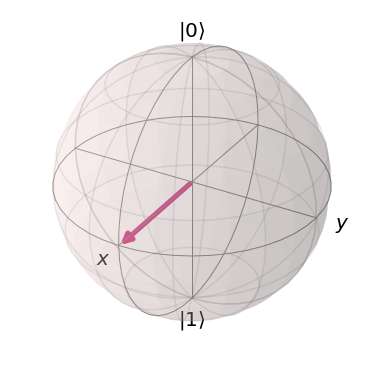

In [30]:
plot_bloch_vector( bloch_vector )

In [31]:
#make the superposition |->
qc = QuantumCircuit(1,1) #make a quantum circuit with 1 qbit and 1 classical bits
qc.x(0) #add a not gate to qbit 0
qc.h(0) #add a hadamard qate to qbit 0
#qc.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

#qc.draw(output='mpl') #draw the circuit

In [32]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

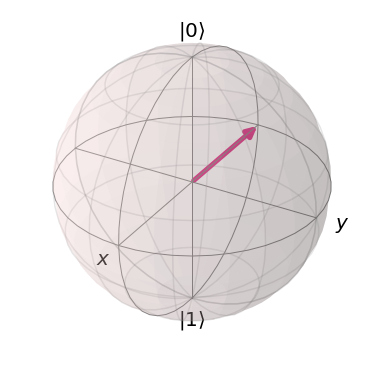

In [33]:
plot_bloch_vector( bloch_vector )